# Getting Started with Text Analysis
The aim of the notebook is to begin with quantitative analysis of text data. We select a Czech text, split it into tokens, perform frequency analysis, and observe the nature of the data.

In this notebook (and further excersises), we will use the following modules:
* Natural Language Toolkit (`nltk`)
* `numpy` - module for numerical operation (extremely handy for vector and matrix calculations)
* `pandas` - module for data processing (handy for table-like data)
* `matplotlib` - module for mathematical visualizations

These four packages are widely used in different text analysis tasks. Many other packages are built upon these four.

**TASK 1**: Get the text of Karel Hynek Macha's Maj. Store it in a plain text file (no .DOC or .DOCX).

For future use, store the text as `../resources/maj.txt`.

## Install necessary packages
In this notebook, we use NLTK (Natural Language ToolKit) for tokenization of input text, and Pandas, a package for easy handling of tabular data.

N.B. In some installations, `pip` is replaced by `pip3`. If the installation doesn't work and you see `/bin/bash: pip: command not found`, try to rename `pip` to `pip3` and re-run the cell.

In [3]:
!pip install --user nltk
!pip install --user pandas
!pip install --user matplotlib
!pip install --user numpy

/bin/bash: pip: command not found
/bin/bash: pip: command not found
/bin/bash: pip: command not found
/bin/bash: pip: command not found


In [4]:
import pandas as pd
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from collections import Counter
import numpy as np

[nltk_data] Downloading package punkt to /home/zuzana/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Get the data
Here, you have to probably change the filename.

In [7]:
text = None
with open('../resources/maj.txt') as f:
    text = f.read()

**TASK 2**: What is the purpose of tokenization? Hint: Let print `word_tokenize("your short text")` in a separate cell. Why we don't just split the text by spaces?

In [8]:
tokens = Counter()
for token in word_tokenize(text):
    if token:
        tokens[token] += 1
tokens

Counter({'1': 1,
         'Byl': 3,
         'pozdní': 6,
         'večer': 5,
         '–': 256,
         'první': 6,
         'máj': 15,
         'večerní': 7,
         'byl': 5,
         'lásky': 11,
         'čas': 23,
         '.': 203,
         'Hrdliččin': 1,
         'zval': 3,
         'ku': 10,
         'lásce': 7,
         'hlas': 28,
         ',': 405,
         'kde': 14,
         'borový': 3,
         'zaváněl': 2,
         'háj': 4,
         'O': 2,
         'šeptal': 2,
         'tichý': 7,
         'mech': 2,
         ';': 67,
         'květoucí': 3,
         'strom': 3,
         'lhal': 2,
         'žel': 4,
         'svou': 14,
         'lásku': 2,
         'slavík': 2,
         'růži': 3,
         'pěl': 2,
         'růžinu': 2,
         'jevil': 2,
         'vonný': 3,
         'vzdech': 3,
         'Jezero': 2,
         'hladké': 2,
         'v': 130,
         'křovích': 2,
         'stinných': 2,
         'zvučelo': 2,
         'temně': 2,
         'tajný': 2,
   

## Create DataFrame
Pandas DataFrame is a data object, easy to handle. Let's experiment with it.

In [9]:
df = pd.DataFrame.from_dict({"token": [k for k,v in dict(tokens).items()], "freq": [v for k,v in dict(tokens).items()]})
df.head()

token  freq
0       1     1
1     Byl     3
2  pozdní     6
3   večer     5
4       –   256

### DataFrame Info
**TASK 3**: How many different tokens are in the text? This number is the *vocabulary size*.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1926 entries, 0 to 1925
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   token   1926 non-null   object
 1   freq    1926 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 30.2+ KB


In [11]:
df.sort_values(by='token', ascending=True).head()

token  freq
240      !    82
1068     (     4
1069     )     4
17       ,   405
11       .   203

**TASK 4**: What are the most frequent tokens in the text? Write down what you think will be 5 most frequent tokens. Sort data by frequency and display 5 most frequent tokens.

### Pandas Series
Pandas Series is a slice of DataFrame. Usually, a Series is a result of slicing a DataFrame using a condition.
Let's see a singe row, a single column, and a single cell.



In [12]:
df.loc[0]

token    1
freq     1
Name: 0, dtype: object

In [13]:
df['freq']

0         1
1         3
2         6
3         5
4       256
       ... 
1921      1
1922      1
1923      1
1924      1
1925      1
Name: freq, Length: 1926, dtype: int64

In [14]:
df['token'][0]

'1'

#### Tokens with a certain frequency

In [15]:
df.loc[df.freq==10]

token  freq
14       ku    10
64     slzy    10
89     tvář    10
116    vzdy    10
154     pod    10
161  jezera    10
294      si    10
298    hory    10
467    lesů    10
531   žádný    10
534    bílé    10
592   vězeň    10
608     sen    10
848    opět    10

### Data Visualization

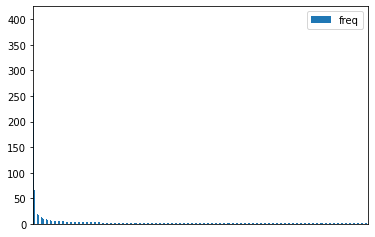

In [16]:
ax = df.sort_values(by='freq', ascending=False).plot(kind='bar')
ax.get_xaxis().set_visible(False)

The distribution you see is called Zipf distribution. See how different it is from *normal* distribution that represents e.g. height of humans.

N.B. The data below are generated by a random number generator (`np.random.randn`). If not specified otherwise, random numbers follow the normal distribution.

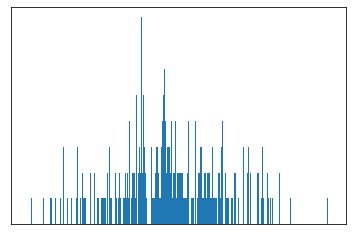

In [18]:
s = pd.Series(np.random.randn(1000))
ax = s.plot.hist(bins=1000)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

**TASK 5**: Determine how many tokens appear only once in the text. What it the percentage?